In [0]:
# from google.colab import files
# uploaded = files.upload()

In [4]:
import pandas as pd

df = pd.read_csv('Congressional.csv')

print(df.shape)
df.head()

(435, 27)


,District Short,District Long,State_Short,State,Wikipedia Page,Wikipedia_Mobile,Rep First Last,"Rep Last, First",Website,Party,ACHA Vote,Margin of Victory 2016,Total Vote,Top Opponent,Hispanic,White,Black,Native American,Asian,Pacific,Other,Multiple Races,Total,Senator 1,Senator 2,Room,Phone
0,AL-1,Alabama District 1,AL,Alabama,https://en.wikipedia.org/wiki/Alabama%27s_1st_...,https://en.m.wikipedia.org/wiki/Alabama%27s_1s...,Bradley Byrne,"Byrne, Bradley",https://byrne.house.gov/,Republican,Y,92.80%,"215,893",Write-in,"19,787","451,980","190,107","6,992","9,528",65,270,"8,979","687,708",Shelby,Strange,119 CHOB,202-225-4931
1,AL-2,Alabama District 2,AL,Alabama,https://en.wikipedia.org/wiki/Alabama%27s_2nd_...,https://en.m.wikipedia.org/wiki/Alabama%27s_2n...,Martha Roby,"Roby, Martha",https://roby.house.gov/,Republican,Y,8.20%,"276,584",Nathan Mathis,"24,462","434,218","203,556","2,354","7,922",142,"1,211","11,637","685,502",Shelby,Strange,442 CHOB,202-225-2901
2,AL-3,Alabama District 3,AL,Alabama,https://en.wikipedia.org/wiki/Alabama%27s_3rd_...,https://en.m.wikipedia.org/wiki/Alabama%27s_3r...,Mike D. Rogers,"Rogers, Mike",https://mikerogers.house.gov/,Republican,Y,34%,"287,104",Jesse Smith,"18,776","476,399","172,551","1,889","8,455",204,421,"8,302","686,997",Shelby,Strange,2184 RHOB,202-225-3261
3,AL-4,Alabama District 4,AL,Alabama,https://en.wikipedia.org/wiki/Alabama%27s_4th_...,https://en.m.wikipedia.org/wiki/Alabama%27s_4t...,Robert B. Aderholt,"Aderholt, Robert",https://aderholt.house.gov/,Republican,Y,97.10%,"239,444",Write-in,"40,209","577,799","45,921","4,588","3,832",139,184,"10,569","683,241",Shelby,Strange,235 CHOB,202-225-4876
4,AL-5,Alabama District 5,AL,Alabama,https://en.wikipedia.org/wiki/Alabama%27s_5th_...,https://en.m.wikipedia.org/wiki/Alabama%27s_5t...,Mo Brooks,"Brooks, Mo",https://brooks.house.gov/,Republican,Y,33.50%,"308,326",Will Boyd,"33,003","510,101","116,706","4,577","11,114",474,583,"13,437","689,995",Shelby,Strange,2400 RHOB,202-225-4801


In [5]:
# Our goal at this point to predict a candidate's party affiliation based on
# the demographics of his or her constituency and possibly other factors such
# a victory margin.

# Removing Obviously Irrelevant Data, inclduing:
# "Wikipedia Page", "Wikipedia_Mobile", "Website", "Room", "Phone"

# df.columns allows us to see if there are any pesky trailing spaces
df.columns

Index(['District Short', 'District Long', 'State_Short', 'State',
       'Wikipedia Page', 'Wikipedia_Mobile', 'Rep First Last',
       'Rep Last, First', 'Website', 'Party', 'ACHA Vote',
       'Margin of Victory 2016', 'Total Vote', 'Top Opponent', 'Hispanic',
       'White', 'Black', 'Native American', 'Asian', 'Pacific', 'Other',
       'Multiple Races', 'Total', 'Senator 1', 'Senator 2', 'Room', 'Phone'],
      dtype='object')

In [6]:
df = df.drop(["Wikipedia Page", "Wikipedia_Mobile", "Website", "Room", "Phone"],
             axis = 1)

print(df.shape)
df.head()

(435, 22)


,District Short,District Long,State_Short,State,Rep First Last,"Rep Last, First",Party,ACHA Vote,Margin of Victory 2016,Total Vote,Top Opponent,Hispanic,White,Black,Native American,Asian,Pacific,Other,Multiple Races,Total,Senator 1,Senator 2
0,AL-1,Alabama District 1,AL,Alabama,Bradley Byrne,"Byrne, Bradley",Republican,Y,92.80%,"215,893",Write-in,"19,787","451,980","190,107","6,992","9,528",65,270,"8,979","687,708",Shelby,Strange
1,AL-2,Alabama District 2,AL,Alabama,Martha Roby,"Roby, Martha",Republican,Y,8.20%,"276,584",Nathan Mathis,"24,462","434,218","203,556","2,354","7,922",142,"1,211","11,637","685,502",Shelby,Strange
2,AL-3,Alabama District 3,AL,Alabama,Mike D. Rogers,"Rogers, Mike",Republican,Y,34%,"287,104",Jesse Smith,"18,776","476,399","172,551","1,889","8,455",204,421,"8,302","686,997",Shelby,Strange
3,AL-4,Alabama District 4,AL,Alabama,Robert B. Aderholt,"Aderholt, Robert",Republican,Y,97.10%,"239,444",Write-in,"40,209","577,799","45,921","4,588","3,832",139,184,"10,569","683,241",Shelby,Strange
4,AL-5,Alabama District 5,AL,Alabama,Mo Brooks,"Brooks, Mo",Republican,Y,33.50%,"308,326",Will Boyd,"33,003","510,101","116,706","4,577","11,114",474,583,"13,437","689,995",Shelby,Strange


In [7]:
# In order to make our demographic data to be useful in predicting pary
# affiliation, each of the ethno-racial categories need to be converted to
# percentages.

# First let's get a look at the datatypes in each column.
df.dtypes

District Short            object
District Long             object
State_Short               object
State                     object
Rep First Last            object
Rep Last, First           object
Party                     object
ACHA Vote                 object
Margin of Victory 2016    object
Total Vote                object
Top Opponent              object
Hispanic                  object
White                     object
Black                     object
Native American           object
Asian                     object
Pacific                   object
Other                     object
Multiple Races            object
Total                     object
Senator 1                 object
Senator 2                 object
dtype: object

In [8]:
# Function for removing the commas and converting the values to integers.
def remove_comma(string):
  return int(string.replace(",", ""))

string = "19,787"

print(type(remove_comma(string)), remove_comma(string))

<class 'int'> 19787


In [9]:
# In retrospect I probably should have done this with a for loop.

# Now to apply the function to the appropriate columns:
df.Hispanic = df.Hispanic.apply(remove_comma)
df.Hispanic.head()

0    19787
1    24462
2    18776
3    40209
4    33003
Name: Hispanic, dtype: int64

In [10]:
df.White = df.White.apply(remove_comma)
df.White.head()

0    451980
1    434218
2    476399
3    577799
4    510101
Name: White, dtype: int64

In [11]:
df.Black = df.Black.apply(remove_comma)
df.Black.head()

0    190107
1    203556
2    172551
3     45921
4    116706
Name: Black, dtype: int64

In [12]:
df['Native American']= df['Native American'].apply(remove_comma)
df['Native American'].head()

0    6992
1    2354
2    1889
3    4588
4    4577
Name: Native American, dtype: int64

In [13]:
df.Asian = df.Asian.apply(remove_comma)
df.Asian.head()

0     9528
1     7922
2     8455
3     3832
4    11114
Name: Asian, dtype: int64

In [14]:
df.Pacific = df.Pacific.apply(remove_comma)
df.Pacific.head()

0     65
1    142
2    204
3    139
4    474
Name: Pacific, dtype: int64

In [15]:
df.Other = df.Other.apply(remove_comma)
df.Other.head()

0     270
1    1211
2     421
3     184
4     583
Name: Other, dtype: int64

In [16]:
df['Multiple Races']= df['Multiple Races'].apply(remove_comma)
df['Multiple Races'].head()

0     8979
1    11637
2     8302
3    10569
4    13437
Name: Multiple Races, dtype: int64

In [17]:
df.Total = df.Total.apply(remove_comma)
df.Total.head()

0    687708
1    685502
2    686997
3    683241
4    689995
Name: Total, dtype: int64

In [18]:
df.dtypes

District Short            object
District Long             object
State_Short               object
State                     object
Rep First Last            object
Rep Last, First           object
Party                     object
ACHA Vote                 object
Margin of Victory 2016    object
Total Vote                object
Top Opponent              object
Hispanic                   int64
White                      int64
Black                      int64
Native American            int64
Asian                      int64
Pacific                    int64
Other                      int64
Multiple Races             int64
Total                      int64
Senator 1                 object
Senator 2                 object
dtype: object

In [19]:
# We will perform feature engineering on the "Total Vote" and "Total"
# columns in order to make a "Percent of Total Votes Column."

# We will see if Democrats or Republicans tend to got higher percentages of
# the total vote in the 2017 Election for House of Representatives.
print(type(df['Total Vote'][0]), df['Total Vote'][0])

<class 'str'> 215,893


In [20]:
df['Total Vote'].isnull().sum()

2

In [21]:
import numpy as np

no_total_vote = df[df['Total Vote'].isnull()]
no_total_vote

,District Short,District Long,State_Short,State,Rep First Last,"Rep Last, First",Party,ACHA Vote,Margin of Victory 2016,Total Vote,Top Opponent,Hispanic,White,Black,Native American,Asian,Pacific,Other,Multiple Races,Total,Senator 1,Senator 2
103,FL-24,Florida District 24,FL,Florida,Frederica S. Wilson,"Wilson, Frederica",Democrat,N,100%,NaN,Unopposed,221503,86295,372545,462,11245,82,2224,6360,700716,Nelson,Rubio
314,OK-1,Oklahoma District 1,OK,Oklahoma,Jim Bridenstine,"Bridenstine, Jim",Republican,Y,100%,NaN,Unopposed,75826,505804,66185,40362,16777,452,948,52282,758636,Inhofe,Lankford


In [0]:
# We will remove the rows with NaN values for the sake of consistency
df = df.drop(no_total_vote.index)

In [23]:
df['Total Vote'].isnull().sum()

0

In [24]:
df['Total Vote']= df['Total Vote'].apply(remove_comma)
df['Total Vote'].head()

0    215893
1    276584
2    287104
3    239444
4    308326
Name: Total Vote, dtype: int64

In [25]:
# Converting Margin of Victory 2016 will require a separate function
# to be usable.

def percent_to_float(string):
  return(float(string.strip('%')))

percent = "12.50%"

print(type(percent_to_float(percent)), percent_to_float(percent))

<class 'float'> 12.5


In [26]:
df['Margin of Victory 2016'] = df['Margin of Victory 2016'].apply(percent_to_float)
df['Margin of Victory 2016'].head()

0    92.8
1     8.2
2    34.0
3    97.1
4    33.5
Name: Margin of Victory 2016, dtype: float64

In [27]:
df.dtypes

District Short             object
District Long              object
State_Short                object
State                      object
Rep First Last             object
Rep Last, First            object
Party                      object
ACHA Vote                  object
Margin of Victory 2016    float64
Total Vote                  int64
Top Opponent               object
Hispanic                    int64
White                       int64
Black                       int64
Native American             int64
Asian                       int64
Pacific                     int64
Other                       int64
Multiple Races              int64
Total                       int64
Senator 1                  object
Senator 2                  object
dtype: object

In [28]:
# Now for the feature engineering to begin:

# Voter Turnout
# NOTE: Due to my source's lack of clarity
# (COMPLETE ABSCENCE of any descriptions in the data dictionary)
# It is unclear whether Voter Turnout here represents total voter turnout or
# victorious candidate voter turnout.

df['Voter Turnout'] = (df['Total Vote'].values / df['Total'].values) * 100
df['Voter Turnout'].head()

0    31.393120
1    40.347658
2    41.791158
3    35.045321
4    44.685251
Name: Voter Turnout, dtype: float64

In [29]:
df.columns

Index(['District Short', 'District Long', 'State_Short', 'State',
       'Rep First Last', 'Rep Last, First', 'Party', 'ACHA Vote',
       'Margin of Victory 2016', 'Total Vote', 'Top Opponent', 'Hispanic',
       'White', 'Black', 'Native American', 'Asian', 'Pacific', 'Other',
       'Multiple Races', 'Total', 'Senator 1', 'Senator 2', 'Voter Turnout'],
      dtype='object')

In [30]:
# This too is rather for-loop-able:

# Percentages by Ethno-racial group:

# Percentage of Hispanics:
df['Hispanics %'] = (df['Hispanic'].values / df['Total'].values) * 100
df['Hispanics %'].head()

0    2.877239
1    3.568480
2    2.733054
3    5.885039
4    4.783078
Name: Hispanics %, dtype: float64

In [31]:
df['Whites %'] = (df['White'].values / df['Total'].values) * 100
df['Whites %'].head()

0    65.722661
1    63.343068
2    69.345135
3    84.567378
4    73.928217
Name: Whites %, dtype: float64

In [32]:
df['Blacks %'] = (df['Black'].values / df['Total'].values) * 100
df['Blacks %'].head()

0    27.643564
1    29.694443
2    25.116704
3     6.721055
4    16.914036
Name: Blacks %, dtype: float64

In [33]:
df['Native Americans %'] = (df['Native American'].values / df['Total'].values) * 100
df['Native Americans %'].head()

0    1.016711
1    0.343398
2    0.274965
3    0.671505
4    0.663338
Name: Native Americans %, dtype: float64

In [34]:
df['Asians %'] = (df['Asian'].values / df['Total'].values) * 100
df['Asians %'].head()

0    1.385472
1    1.155649
2    1.230719
3    0.560856
4    1.610736
Name: Asians %, dtype: float64

In [35]:
df['Pacific Islanders %'] = (df['Pacific'].values / df['Total'].values) * 100
df['Pacific Islanders %'].head()

0    0.009452
1    0.020715
2    0.029694
3    0.020344
4    0.068696
Name: Pacific Islanders %, dtype: float64

In [36]:
df['Other %'] = (df['Other'].values / df['Total'].values) * 100
df['Other %'].head()

0    0.039261
1    0.176659
2    0.061281
3    0.026930
4    0.084493
Name: Other %, dtype: float64

In [37]:
df['Multiple Races %'] = (df['Multiple Races'].values / df['Total'].values) * 100
df['Multiple Races %'].head()

0    1.305641
1    1.697588
2    1.208448
3    1.546892
4    1.947405
Name: Multiple Races %, dtype: float64

In [38]:
# Double Checking for NaN values in the entire DataFrame
# before we move forward
df.isnull().sum().sum()

0

In [39]:
df.head()

,District Short,District Long,State_Short,State,Rep First Last,"Rep Last, First",Party,ACHA Vote,Margin of Victory 2016,Total Vote,Top Opponent,Hispanic,White,Black,Native American,Asian,Pacific,Other,Multiple Races,Total,Senator 1,Senator 2,Voter Turnout,Hispanics %,Whites %,Blacks %,Native Americans %,Asians %,Pacific Islanders %,Other %,Multiple Races %
0,AL-1,Alabama District 1,AL,Alabama,Bradley Byrne,"Byrne, Bradley",Republican,Y,92.8,215893,Write-in,19787,451980,190107,6992,9528,65,270,8979,687708,Shelby,Strange,31.393120,2.877239,65.722661,27.643564,1.016711,1.385472,0.009452,0.039261,1.305641
1,AL-2,Alabama District 2,AL,Alabama,Martha Roby,"Roby, Martha",Republican,Y,8.2,276584,Nathan Mathis,24462,434218,203556,2354,7922,142,1211,11637,685502,Shelby,Strange,40.347658,3.568480,63.343068,29.694443,0.343398,1.155649,0.020715,0.176659,1.697588
2,AL-3,Alabama District 3,AL,Alabama,Mike D. Rogers,"Rogers, Mike",Republican,Y,34.0,287104,Jesse Smith,18776,476399,172551,1889,8455,204,421,8302,686997,Shelby,Strange,41.791158,2.733054,69.345135,25.116704,0.274965,1.230719,0.029694,0.061281,1.208448
3,AL-4,Alabama District 4,AL,Alabama,Robert B. Aderholt,"Aderholt, Robert",Republican,Y,97.1,239444,Write-in,40209,577799,45921,4588,3832,139,184,10569,683241,Shelby,Strange,35.045321,5.885039,84.567378,6.721055,0.671505,0.560856,0.020344,0.026930,1.546892
4,AL-5,Alabama District 5,AL,Alabama,Mo Brooks,"Brooks, Mo",Republican,Y,33.5,308326,Will Boyd,33003,510101,116706,4577,11114,474,583,13437,689995,Shelby,Strange,44.685251,4.783078,73.928217,16.914036,0.663338,1.610736,0.068696,0.084493,1.947405


In [40]:
# Establishing a baseline accuracy
print(df.Party.value_counts(normalize = True), '\n')
df.Party.value_counts()

# Hmm, I did not realize that the data would include vacancies
# I was expecting there to be an independent category. 

Republican    0.547344
Democrat      0.443418
Vacant        0.009238
Name: Party, dtype: float64 



Republican    237
Democrat      192
Vacant          4
Name: Party, dtype: int64

In [41]:
# Since there were only 4 total vacancies, we will simply drop them.
df = df[df['Party'].isin(['Republican', 'Democrat'])]
df.Party.value_counts(normalize = True)

Republican    0.552448
Democrat      0.447552
Name: Party, dtype: float64

In [42]:
# 55.24% shouldn't be too hard to beat.
baseline = df.Party.value_counts(normalize = True)['Republican']
print(f'Baseline Accuracy: {round(baseline * 100, 2)}%')

Baseline Accuracy: 55.24%


In [43]:
# In order to pull out a more reasonable test set we'll use the shuffle function.

from sklearn.utils import shuffle
df_shuffled = shuffle(df, random_state = 42)

df_shuffled = df_shuffled.reset_index(drop = True)
df_shuffled.head()

,District Short,District Long,State_Short,State,Rep First Last,"Rep Last, First",Party,ACHA Vote,Margin of Victory 2016,Total Vote,Top Opponent,Hispanic,White,Black,Native American,Asian,Pacific,Other,Multiple Races,Total,Senator 1,Senator 2,Voter Turnout,Hispanics %,Whites %,Blacks %,Native Americans %,Asians %,Pacific Islanders %,Other %,Multiple Races %
0,WI-2,Wisconsin District 2,WI,Wisconsin,Mark Pocan,"Pocan, Mark",Democrat,N,37.6,397581,Peter Theron,42935,603167,29404,2034,26135,162,482,15593,719912,Baldwin,Johnson,55.226333,5.963923,83.783435,4.084388,0.282535,3.630305,0.022503,0.066953,2.165959
1,CO-3,Colorado District 3,CO,Colorado,Scott Tipton,"Tipton, Scott",Republican,Y,14.3,374037,Gail Schwartz,173130,515899,5559,8597,4979,515,1027,10663,720369,Bennet,Gardner,51.922973,24.033516,71.615936,0.771688,1.193416,0.691174,0.071491,0.142566,1.480214
2,ME-2,Maine District 2,ME,Maine,Bruce Poliquin,"Poliquin, Bruce",Republican,Y,9.6,352183,Emily Ann Cain,7747,627553,4494,5214,4291,176,166,12500,662141,Collins,King,53.188520,1.169992,94.776339,0.678707,0.787446,0.648049,0.026580,0.025070,1.887815
3,CA-18,California District 18,CA,California,Anna G. Eshoo,"Eshoo, Anna G.",Democrat,N,42.3,323930,Richard Fox,123768,410579,13307,1606,139469,1161,1518,25883,717291,Feinstein,Harris,45.160193,17.254922,57.240227,1.855175,0.223898,19.443852,0.161859,0.211630,3.608438
4,TX-14,Texas District 14,TX,Texas,Randy Weber,"Weber, Randy",Republican,Y,23.7,259685,Michael Cole,159845,371041,141051,1846,19872,196,1204,8907,703962,Cornyn,Cruz,36.889065,22.706481,52.707533,20.036735,0.262230,2.822880,0.027842,0.171032,1.265267


In [44]:
# Now to determine how much will go in each category.

# 70% for the training data,
# 15% for the validation data,
# 15% for the sacred test set.

features = ["Voter Turnout", "Hispanics %", "Whites %", "Blacks %",
            "Native Americans %", "Asians %", "Pacific Islanders %",
            "Other %", "Multiple Races %"]

target = "Party"

train_size = int(len(df[target]) * 0.70)
val_size = int((len(df[target]) - train_size) / 2) + 1
test_size = len(df[target]) - (train_size + val_size)

train_size, val_size, test_size

(300, 65, 64)

In [45]:
hr = df_shuffled.replace({'Republican' : 1, 'Democrat' : 0})
hr.Party.head()

0    0
1    1
2    1
3    0
4    1
Name: Party, dtype: int64

In [0]:
X_train = hr[features][0 : 300]
X_val = hr[features][300 : 365]
X_test = hr[features][365 : 430]

y_train = hr[target][0 : 300]
y_val = hr[target][300 : 365]
y_test = hr[target][365 : 430]

In [47]:
# First we will begin with a Logistic Regression Model, then see if
# Gradient Boosting nets any positive results on top of our new
# logistic regression model.

# For the Logistic Regression model, I will use the train, val, test split.

# I have chosen accuracy as one of the main metrics for comparing models,
# the other being the roc_auc_score.

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

lr.fit(X_train, y_train)
lr_accuracy_ = lr.score(X_val, y_val)

print('Logistic Regression Model\n')
print('Validation Accuracy:      ', round(lr_accuracy_ * 100, 2), '%')
print('Improvement over baseline:', round((lr.score(X_val, y_val) - baseline) * 100, 2), '%')

Logistic Regression Model

Validation Accuracy:       84.62 %
Improvement over baseline: 29.37 %


In [48]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = lr.predict_proba(X_val)[:, -1]
print('ROC/AUC Score:', roc_auc_score(y_val, y_pred_proba))

ROC/AUC Score: 0.8607954545454546


In [49]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

lr_roc = pd.DataFrame({
    'False Positive Rate' : fpr,
    'True Positive Rate' : tpr,
    'Threshold' : thresholds   
})

lr_roc

,False Positive Rate,True Positive Rate,Threshold
0,0.00000,0.000000,1.999513
1,0.03125,0.000000,0.999513
2,0.09375,0.000000,0.968033
3,0.09375,0.272727,0.902380
4,0.12500,0.272727,0.901140
5,0.12500,0.727273,0.722513
6,0.15625,0.727273,0.713380
7,0.15625,0.878788,0.673576
8,0.18750,0.878788,0.636729
9,0.18750,0.939394,0.577635


In [50]:
# Checking the accuracy score for the Logistic Regression Model at each threshold

import numpy as np
from sklearn.metrics import accuracy_score

accuracy_ls = []

for threshold in thresholds:
  y_pred = np.where(y_pred_proba > threshold, 1, 0)
  accuracy_ls.append(accuracy_score(y_val, y_pred, normalize = True))

lr_accuracy_data = {'Threshold' : thresholds, 'Accuracy' : accuracy_ls}
lr_accuracy = pd.DataFrame(lr_accuracy_data)

lr_accuracy = lr_accuracy[lr_accuracy.Threshold <= 1]
lr_accuracy

,Threshold,Accuracy
1,0.999513,0.492308
2,0.968033,0.461538
3,0.902380,0.569231
4,0.901140,0.584615
5,0.722513,0.784615
6,0.713380,0.800000
7,0.673576,0.846154
8,0.636729,0.861538
9,0.577635,0.861538
10,0.545249,0.861538


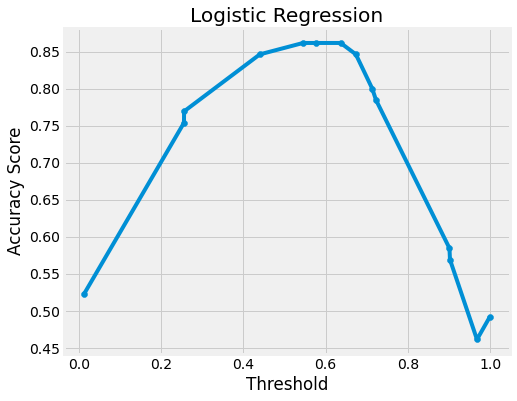

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 6))

plt.style.use('fivethirtyeight')

plt.scatter(lr_accuracy.Threshold, lr_accuracy.Accuracy)
plt.plot(lr_accuracy.Threshold, lr_accuracy.Accuracy)
plt.title('Logistic Regression')
plt.xlabel('Threshold')
plt.ylabel('Accuracy Score');

In [52]:
max_lr_accuracy = lr_accuracy.loc[lr_accuracy[lr_accuracy.Accuracy == lr_accuracy.Accuracy.max()].index]
max_lr_accuracy

,Threshold,Accuracy
8,0.636729,0.861538
9,0.577635,0.861538
10,0.545249,0.861538


In [53]:
print('Logistic Regression')

print('Accuracy for 0.545249 <= threshold <= 0.636729 ~=',
      round(max_lr_accuracy.Accuracy[8] * 100, 2), '%')

# NOTE: this assumes non-standardized values, so this finding should be treated
# as equal to the accuracy score found above

Logistic Regression
Accuracy for 0.545249 <= threshold <= 0.636729 ~= 86.15 %


In [54]:
lr_roc.loc[lr_roc[lr_roc.Threshold.isin(max_lr_accuracy.Threshold)].index]

,False Positive Rate,True Positive Rate,Threshold
8,0.1875,0.878788,0.636729
9,0.1875,0.939394,0.577635
10,0.2500,0.939394,0.545249


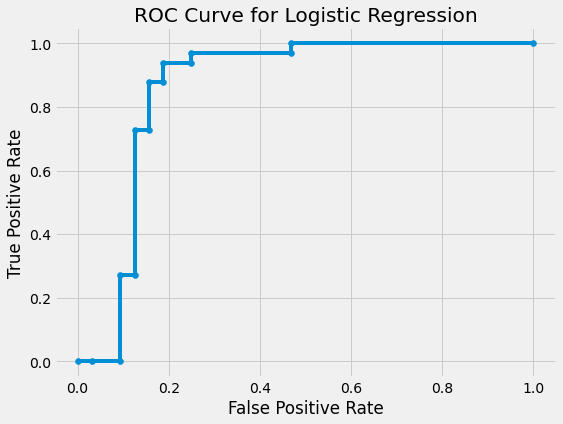

In [55]:
plt.figure(figsize = (8, 6))

plt.style.use('fivethirtyeight')

plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

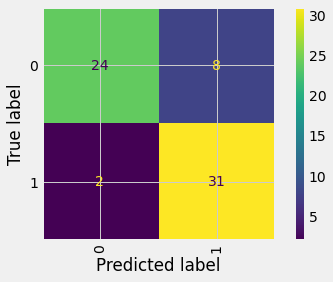

In [56]:
# NOTE: The Confusion Matrix below reflects the validation set.
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_val, y_val, values_format = '.0f',
                      xticks_rotation = 'vertical');

In [57]:
# Permutation Importances
!pip install eli5

     |████████████████████████████████| 112kB 2.7MB/s 


In [0]:
# Since Permutation Importances and Pipelines don't work together, we'll need to
# scale the data "manually."

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

In [59]:
import eli5
# from eli5.sklearn
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    lr, 
    scoring='accuracy', 
    n_iter=5, 
    random_state=42
)

permuter.fit(X_train_scaled, y_train)

print('Permutation Importances')
print('Training Set\n')

eli5.show_weights(
    permuter,
    top = None, 
    feature_names = features 
)

# These findings are somewhat suprising,
# suggesting that the proprotion of

# Having run it and the code above multiple times before reliazing that I needed
# to set a random seed for df_shuffled above, the bottom values seem to vary in
# importance, but the values Other, Percentage; Multiple Races, Percentage; and
# Pacific Islanders, Percentage always seem to be at the top.

# This may suggest that Blacks, Hispanics, and non-Hispanic Whites do vary more
# as their political affilitation than to Islanders and those of mixed race.

# Or, perhaps the Islander's place is simply do Hawaii being the only state with
# majority Islander population, and Hawaii just happens be be blue.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


Permutation Importances
Training Set



Weight,Feature
0.0920 ± 0.0369,Other %
0.0040 ± 0.0078,Multiple Races %
0.0020 ± 0.0090,Pacific Islanders %
0.0007 ± 0.0027,Native Americans %
0 ± 0.0000,Blacks %
0 ± 0.0000,Whites %
0 ± 0.0000,Hispanics %
-0.0013 ± 0.0053,Asians %
-0.0020 ± 0.0033,Voter Turnout


In [60]:
# Pulling out the coefficients for the logit-function allows us to see what
# direction each of the ethno-racial groups tends to push the vote.
lr_model = lr.named_steps['logisticregression']

print('Logit Function:')
print('Intercept:', lr_model.intercept_[0])

lr_coef = list(lr_model.coef_[0])
lr_coef_data = {'Feature' : features, 'Coefficients' : lr_coef}

lr_coefficients = pd.DataFrame(lr_coef_data)
lr_coefficients = lr_coefficients.sort_values(by = 'Coefficients',
                                              ascending = False)

lr_coefficients

Logit Function:
Intercept: 0.11225385011865346


,Feature,Coefficients
2,Whites %,0.826510
4,Native Americans %,0.395116
0,Voter Turnout,-0.284527
1,Hispanics %,-0.400713
5,Asians %,-0.404234
6,Pacific Islanders %,-0.420624
3,Blacks %,-0.528958
8,Multiple Races %,-0.693813
7,Other %,-1.398168


In [61]:
# Converting the Coefficients to Probabilities

# These probabilities reflect the odds that a district will have a Republican
# representative given a majority of the given demographic.

# In the case of voter turnout, this can be interpreted as the probability
# that a state will have a Republican representative given a majority of the
# district's constituency decides to vote.

import math

probabilities = []

def log_odds_to_prob(coefficient):
  numerator = math.e ** coefficient
  denominator = 1 + numerator
  return numerator / denominator

for coefficient in lr_coefficients.Coefficients:
  probabilities.append(log_odds_to_prob(coefficient))

lr_coefficients['Probabilities'] = probabilities

lr_coefficients

,Feature,Coefficients,Probabilities
2,Whites %,0.826510,0.695616
4,Native Americans %,0.395116,0.597514
0,Voter Turnout,-0.284527,0.429344
1,Hispanics %,-0.400713,0.401141
5,Asians %,-0.404234,0.400296
6,Pacific Islanders %,-0.420624,0.396367
3,Blacks %,-0.528958,0.370760
8,Multiple Races %,-0.693813,0.333185
7,Other %,-1.398168,0.198107


#### Recall from above that Republican = 1 and Democrat = 0, so positive values indicate a group's preference for Republican candidates, and positive values indicate  a group's general preference for Democratic Candidates.

#### The higher the absolute value of the coefficient, the greater a group can be said to influence the direction of the vote in the House of Representatives.

#### Groups with lower influence, Pacific Islanders and Native Americans can be said to have little influence on the general direction of House of Representative Votes due to their low population relative to Whites and other minorities. The opposite holds true for Whites and to a lesser degree with Blacks and Hispanics.

#### Note that though a higher Whites, Percentage tends to push the vote the Republican way, and the Blacks, Percentage and Hispanics, Percentage tend to push the vote in the opposite direction, this is not indicative that most Whites or Blacks vote in this manner. Rather, Whites in predominantly White states tend to vote Republican, and Blacks and Hispanics living in states with a greater population of their respective races tend to vote Democrat.

#### Also note with the correlation between the magnitude of a feature's influence and its placement in the permutation importances above

In [62]:
# Now to begin building a Gradient Boosting Model

# First we will begin with a basic model with no special parameters using
# train, val, test; later on we may switch to Cross Validation and see which
# performs better.

from xgboost import XGBClassifier

xgb = make_pipeline(
    StandardScaler(),
    XGBClassifier(n_estimators = 100, random_state = 42, n_jobs = -1)
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_val)
print('Gradient Boosting Model:\n')

print('Validation Accuracy:', round(accuracy_score(y_val, y_pred_xgb) * 100, 2), '%')
print('Improvement over baseline:', round((xgb.score(X_val, y_val) - baseline) * 100, 2), '%')

Gradient Boosting Model:

Validation Accuracy: 80.0 %
Improvement over baseline: 24.76 %


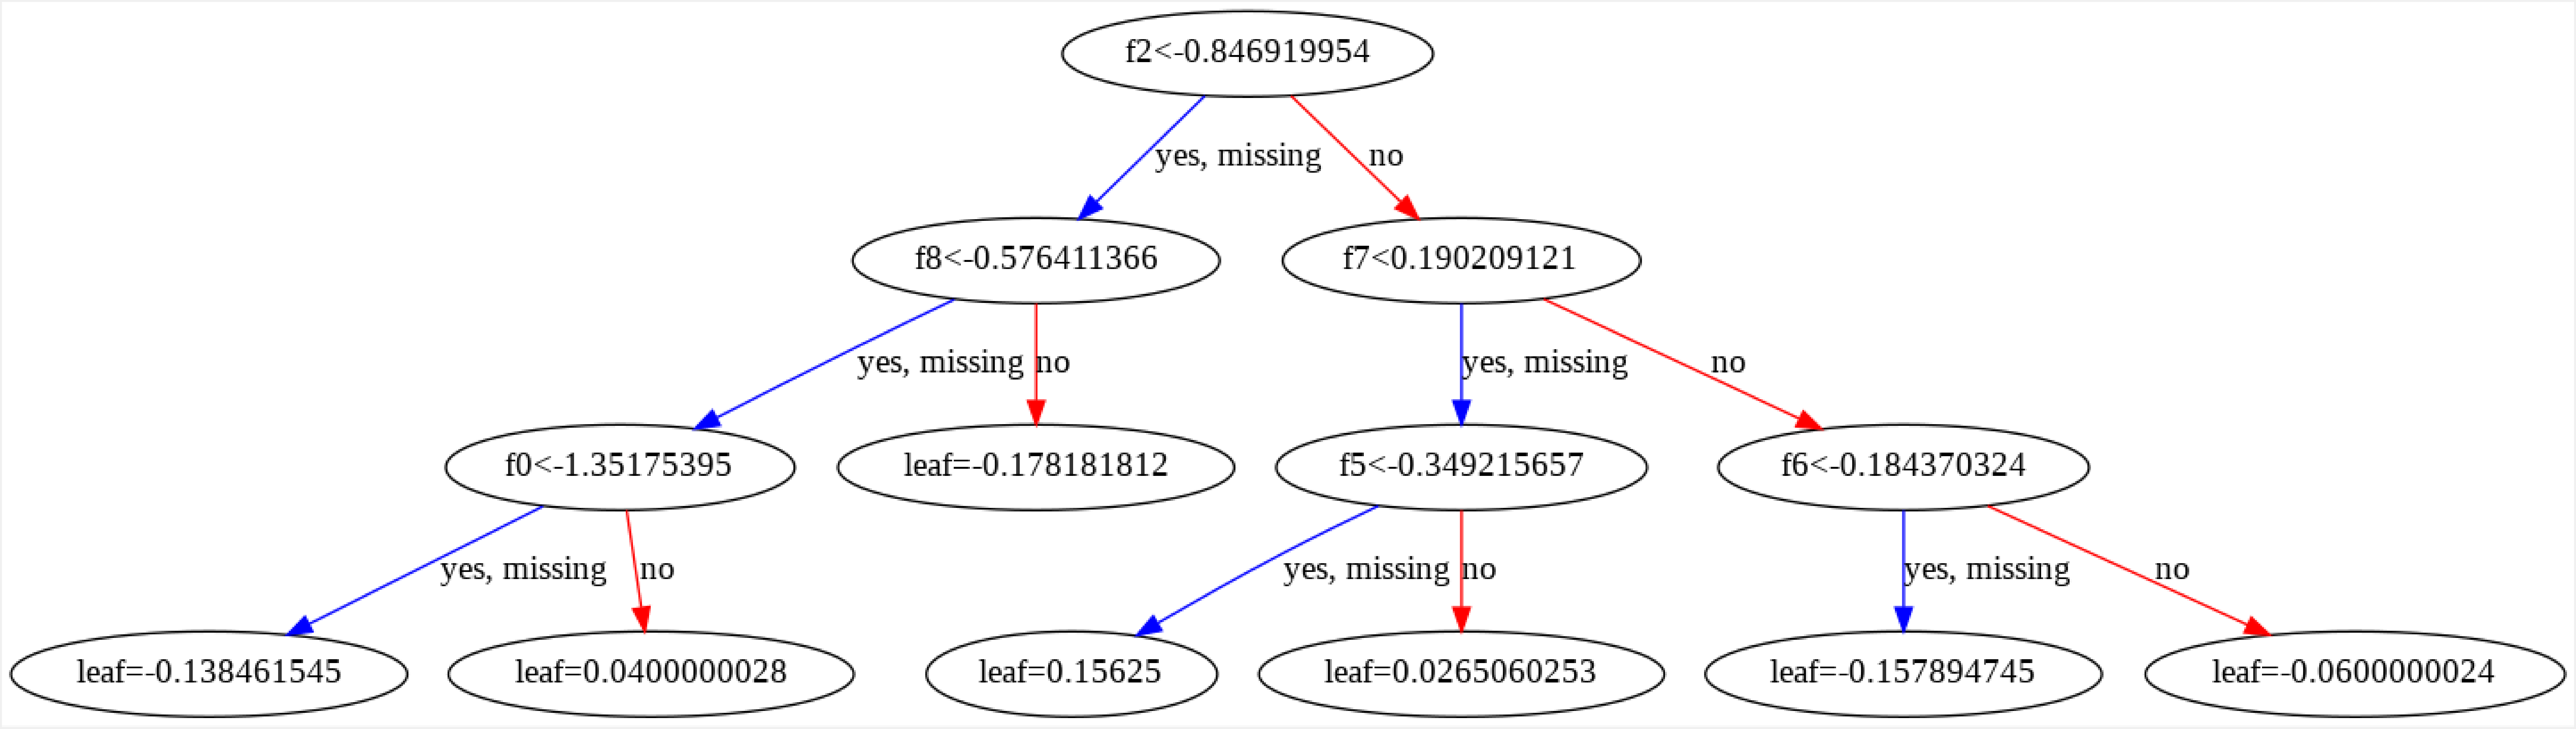

In [63]:
# Let's take a look at the Gradient Boosting Classification Tree

# Comparing this with a later GBC model's tree will give us an intuition as to
# how the tree's pruning helps or hurts our accuracy score.

from xgboost import plot_tree

xgb_model = xgb.named_steps['xgbclassifier']

plot_tree(xgb_model)

fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')

In [64]:
# Cross Validation

# First we change the size of test set in order to perform cross validation.

# For this, we will use an 85/15 split to reflect the 70/15/15 split used above
# This will ensure that the ***sacred test set*** is the same between both
# models


cv_train_size = int(len(df[target]) * 0.85)
cv_test_size = int(len(df[target]) * 0.15)

cv_train_size, cv_test_size

(364, 64)

In [0]:
cv_train = hr[0 : 364]
cv_test = hr[364 : 430]

X_train_cv = cv_train[features]
X_test_cv = cv_test[features]

y_train_cv = cv_train[target]
y_test_cv = cv_test[target]

In [66]:
# We will use randomized search because no human being has the patience to wait
# for grid search.

from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'xgbclassifier__min_split_loss': [0, 2, 4, 6, 8, 10], 
    'xgbclassifier__min_child_weight': [0.25, 0.50, 0.75, 1], 
    'xgbclassifier__reg_lambda': range(0, 6), 
}

search = RandomizedSearchCV(
    xgb, 
    param_distributions = param_distributions, 
    n_iter = 100, 
    cv = 6, 
    scoring = 'accuracy', 
    verbose = 10, 
    return_train_score = True,
    random_state = 42, 
    n_jobs = -1
)

search.fit(X_train_cv, y_train_cv);

Fitting 6 folds for each of 100 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1945s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 226 tas

In [67]:
print('Best hyperparameters\n')

print(search.best_params_)

cv_accuracy = search.best_score_

print('\nCross-Validation Accuracy:', round(cv_accuracy * 100, 2), '%')
print('Improvement over baseline:', round((cv_accuracy - baseline) * 100, 2), '%')

# NOTE: this score is not signifigantly different from the score above,
# partially due to the fact that min_child weight is set at its default.

Best hyperparameters

{'xgbclassifier__reg_lambda': 0, 'xgbclassifier__min_split_loss': 4, 'xgbclassifier__min_child_weight': 1}

Cross-Validation Accuracy: 80.23 %
Improvement over baseline: 24.99 %


In [68]:
# Our Logistic Regression model netted a greater validation accuracy,
# over our Gradient Boosting model. This may be a random fluke owing to
# a lucky shuffle of our data.

# Or it may not be...only the ***sacred test set*** will show for sure.

print('Comparison in Validation Accuracy')
print('Logistic Regression with Train, Val, Test Split')
print('vs.')
print('Gradient Boosting with Cross Validation')

print('\nLR:', round(lr_accuracy_ * 100, 2), '%')
print('GB:', round(cv_accuracy * 100, 2), '%')

Comparison in Validation Accuracy
Logistic Regression with Train, Val, Test Split
vs.
Gradient Boosting with Cross Validation

LR: 84.62 %
GB: 80.23 %


In [69]:
# Now to check our results against the

# ***SACRED TEST SET***

xgb_2 = search.best_estimator_

print('LR')
print('Test Accuracy', round(lr.score(X_test_cv, y_test_cv) * 100, 2), '%')

print('\nGB')
print('Test Accuracy', round(xgb_2.score(X_test_cv, y_test_cv) * 100, 2), '%')

LR
Test Accuracy 80.0 %

GB
Test Accuracy 80.0 %


In [70]:
print('LR')
print('Test Accuracy', lr.score(X_test_cv, y_test_cv))

print('\nGB')
print('Test Accuracy', xgb_2.score(X_test_cv, y_test_cv))

LR
Test Accuracy 0.8

GB
Test Accuracy 0.8


In [71]:
# Let's check the Test ROC Scores for each model in order to expand our
# our intuition as to why the GB Test Accuracy was higher than the LR's

y_pred_proba_test = lr.predict_proba(X_test_cv)[:, -1]

print('LR')
print('ROC/AUC Score:', roc_auc_score(y_test_cv, y_pred_proba_test))

y_pred_proba_test_gb = xgb_2.predict_proba(X_test_cv)[:, -1]
print('\nGB\nROC/AUC Score:', roc_auc_score(y_test_cv, y_pred_proba_test_gb))

LR
ROC/AUC Score: 0.8214285714285715

GB
ROC/AUC Score: 0.8315637065637067


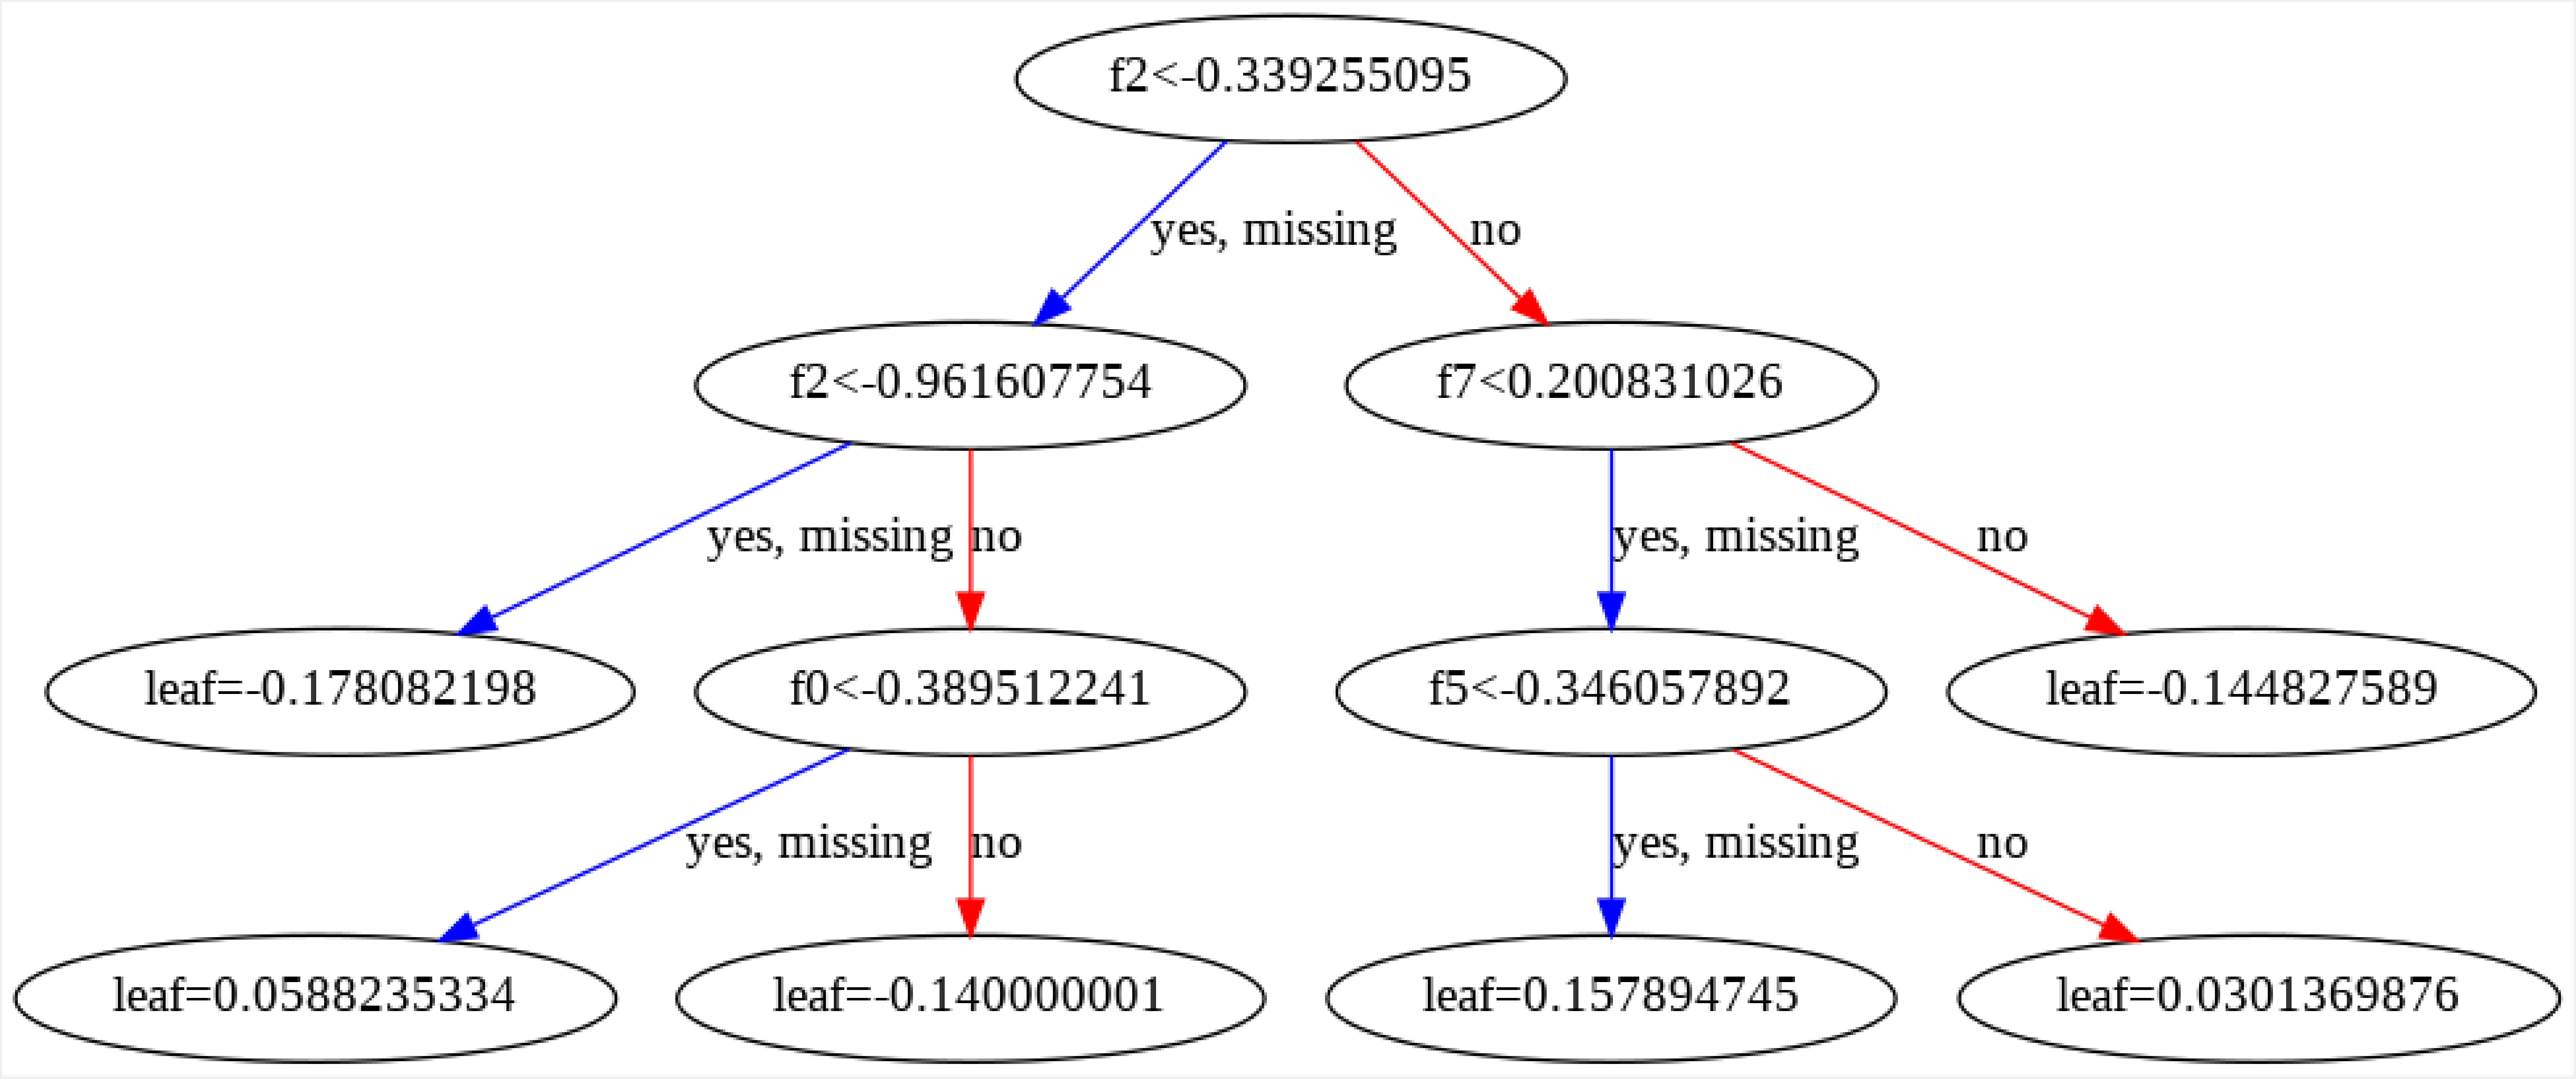

In [72]:
# Let's look at the differences in the initial and final trees:

# Not a signifigant difference all changes appear to have been on the third and
# final splits.

xgb_model_2 = xgb_2.named_steps['xgbclassifier']

plot_tree(xgb_model_2)

fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree2.png')

In [73]:
# SHAP for Gradient Boosting Model

row = X_test_cv.iloc[[2]]
y_test.iloc[[2]]

367    1
Name: Party, dtype: int64

In [74]:
print(xgb_2.predict(row))

[1]


In [75]:
!pip install shap

     |████████████████████████████████| 276kB 2.7MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394116 sha256=8e85601c9f55abcd85cf2d48e676c3697076dc46d82b517cb588ed7fc3eb7c31
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [0]:
import shap

explainer = shap.TreeExplainer(xgb_model_2,
                               X_train_cv,
                               model_output = 'probability')

shap_values = explainer.shap_values(row)

In [91]:
shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value, 
    shap_values = shap_values,
    features = row,
    link = 'logit'
)

In [87]:
row_2 = X_test_cv.iloc[[6]]
y_test_cv.iloc[[6]]

370    0
Name: Party, dtype: int64

In [88]:
print(xgb_2.predict(row_2))

[0]


In [90]:
shap_values_2 = explainer.shap_values(row_2)

shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value, 
    shap_values = shap_values_2,
    features = row,
    link = 'logit'
)

In [0]:
!pip install dash==1.11.0

In [0]:
import dash_core_components
print(dash_core_components.__version__)